# Swiss Super League - xG vs. xGOT

## Imports

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, NoNorm
from matplotlib import cm
import matplotlib.gridspec as gridspec
import numpy as np

from PIL import Image
import urllib
import json
import os

In [70]:
from matplotlib.font_manager import FontProperties

# Specify your font
regular = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Regular.ttf")  # Update the path to where the font is installed on your system
light = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Light.ttf")  # Update the path to where the font is installed on your system
bold = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Bold.ttf")  # Update the path to where the font is installed on your system

In [71]:
#league = 'Premier League'
league = 'Championship'

## Read the data

In [72]:
df = pd.read_csv(r"C:\Users\George\Documents\Football Analytics\fotmob_Championship_expected_data.csv")
#df = pd.read_csv(r"C:\Users\George\Documents\Football Analytics\fotmob_Premier League_expected_data.csv")
df.head()

,id,date,team_name,team_id,xG_for,xG_ag,xGOT_for,xGOT_ag,goals_for,goals_ag,venue
0,4202238,2023-08-04 19:00:00+00:00,Sheffield Wednesday,10163,0.56,1.39,0.39,1.91,1,2,H
1,4202238,2023-08-04 19:00:00+00:00,Southampton,8466,1.39,0.56,1.91,0.39,2,1,A
2,4202251,2023-08-05 14:00:00+00:00,Blackburn Rovers,8655,1.57,0.82,1.21,0.78,2,1,H
3,4202251,2023-08-05 14:00:00+00:00,West Bromwich Albion,8659,0.82,1.57,0.78,1.21,1,2,A
4,4202252,2023-08-05 14:00:00+00:00,Bristol City,8427,0.90,1.32,1.39,0.57,1,1,H


In [73]:
df = df[['team_id','team_name','xG_for','xGOT_for']]

In [74]:
df

,team_id,team_name,xG_for,xGOT_for
0,10163,Sheffield Wednesday,0.56,0.39
1,8466,Southampton,1.39,1.91
2,8655,Blackburn Rovers,1.57,1.21
3,8659,West Bromwich Albion,0.82,0.78
4,8427,Bristol City,0.90,1.39
...,...,...,...,...
1109,9850,Norwich City,0.57,0.28
1110,8466,Southampton,1.35,2.01
1111,8659,West Bromwich Albion,0.77,0.49
1112,8463,Leeds United,0.65,0.39


In [75]:
df.replace({'team_name': {'Tottenham': 'Tottenham Hotspur'}}, inplace=True)

In [76]:
df['team_name'] = df['team_name'].replace({'AFC Bournemouth':'Bournemouth','West Bromwich Albion':'West Brom','Preston North End':'Preston','Queens Park Rangers':'QPR','Blackburn Rovers':'Blackburn','Sheffield Wednesday':'Sheffield Weds','Huddersfield Town':'Huddersfield','Rotherham United':'Rotherham Utd', 'Tottenham Hotspur':'Tottenham', 'Newcastle United':'Newcastle Utd', 'Manchester United':'Man United', 'Brighton and Hove Albion':'Brighton','Brighton & Hove Albion':'Brighton', 'Wolverhampton Wanderers':'Wolves', 'Nottingham Forest':'Nott\'ham Forest', 'Sheffield United':'Sheffield Utd', 'West Ham United': 'West Ham', 'Manchester City':'Man City','Tottenham Hotspur': 'Tottenham'})

In [77]:
team_stats = df.groupby('team_name').agg({
    'xG_for': 'sum',
    'xGOT_for': 'sum'
}).reset_index()

# Create a new dataframe with the same columns as the original
result_df = pd.DataFrame({
    'team_id': team_stats['team_name'].map(df.set_index('team_name')['team_id'].to_dict()),
    'team_name': team_stats['team_name'],
    'xG_for': team_stats['xG_for'],
    'xGOT_for': team_stats['xGOT_for']
})

# Sort the dataframe by team_id to maintain the original order
result_df = result_df.sort_values('xG_for', ascending=True).reset_index(drop=True)

In [78]:
df = result_df

## Create color map for gradient

In [79]:
colors = [
    '#efe9e6',
    '#e9e1dd',
    '#e3dad3',
    '#dcd3c9',
    '#d4ccc0',
    '#ccc6b7',
    '#c3bfae',
    '#bab9a6',
    '#b0b39e',
    '#a6ad96',
    '#9ba790',
    '#90a18a',
    '#849b84',
    '#789680',
    '#6c907c',
    '#608a79',
    '#538476',
    '#467e74',
    '#387872',
    '#287271',
]
soc_cm = LinearSegmentedColormap.from_list('SOC', colors, N=50)
#cm.register_cmap(name='SOC', cmap=soc_cm)

In [80]:
df['diff'] = df['xGOT_for'] - df['xG_for']

In [81]:
df = df.head(12)

In [82]:
df.reset_index(drop=True, inplace=True)

In [83]:
todays_date = pd.to_datetime('today').date()

## The Visual

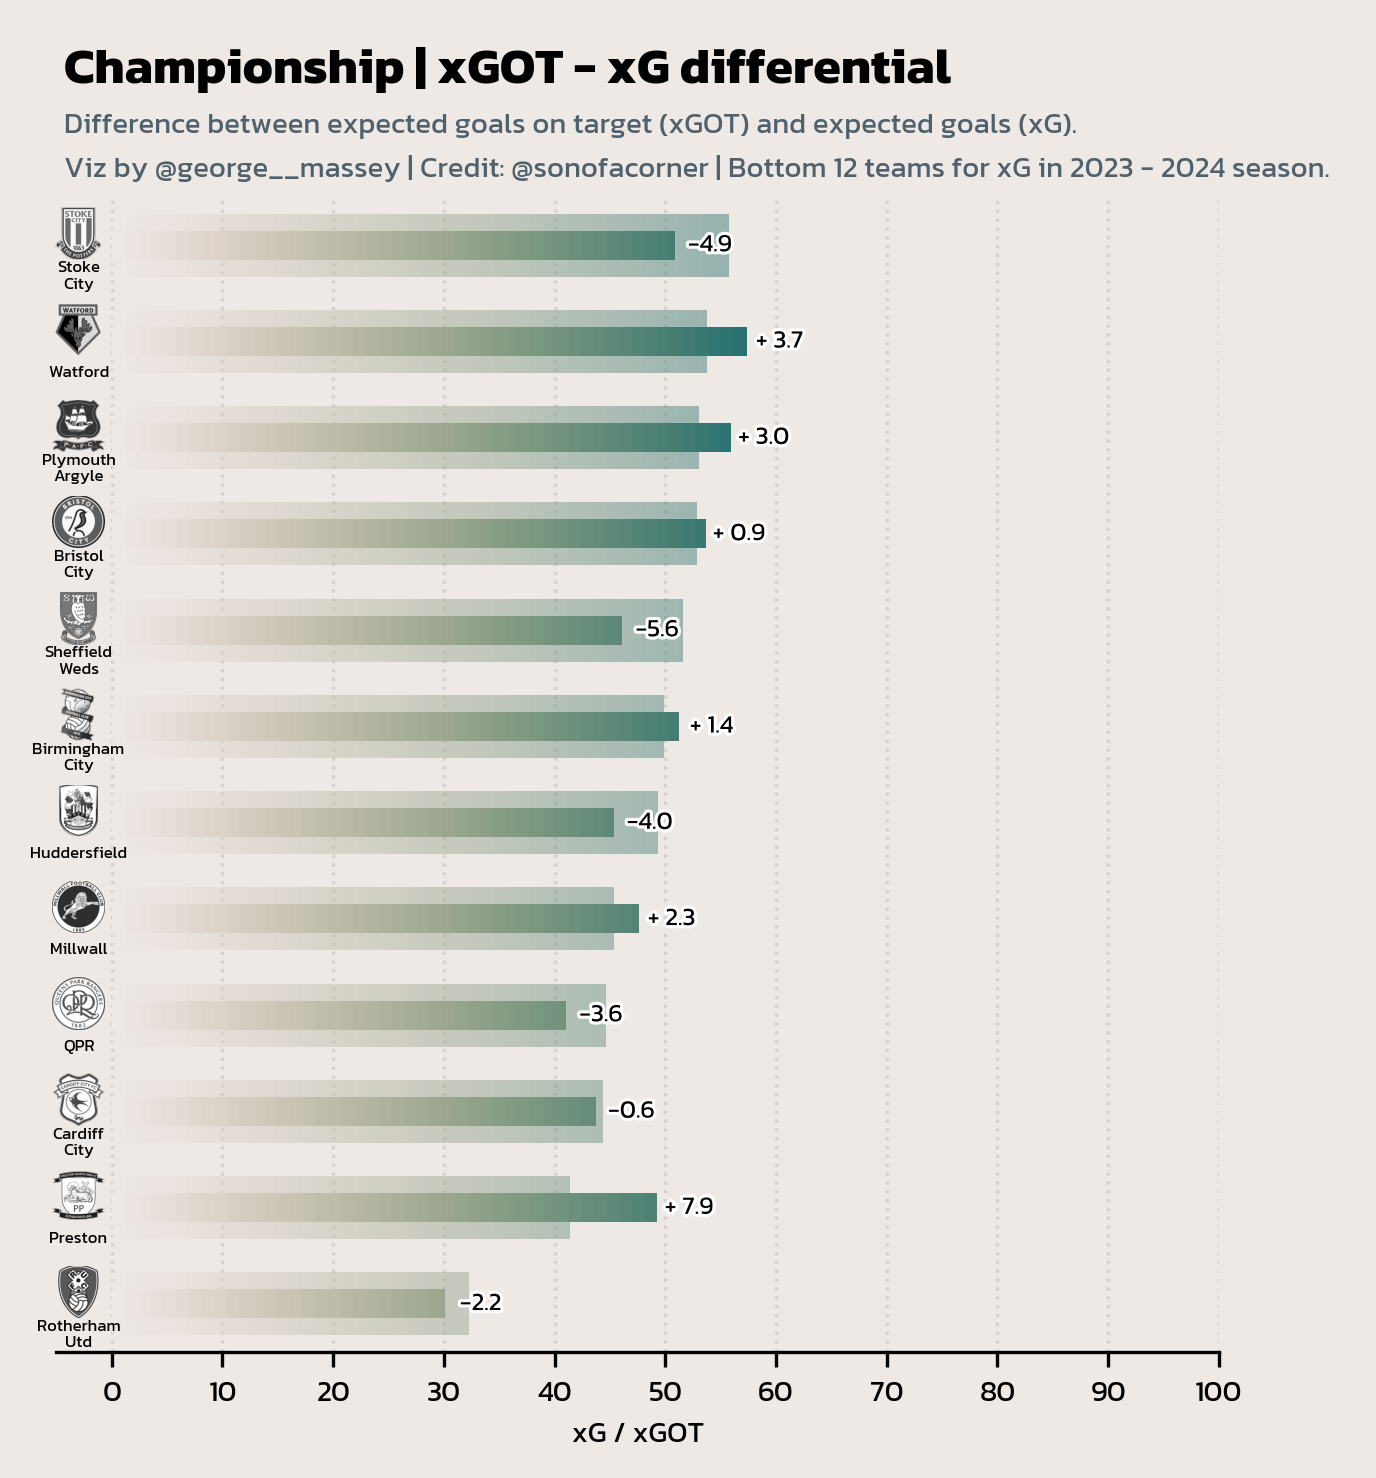

In [84]:
fig = plt.figure(figsize=(5,5), dpi=300, facecolor='#EFE9E6')
ax = plt.subplot(111)

ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([])
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_label_text('xG / xGOT', size=7, fontproperties = regular)
ax.grid(axis='x', color='lightgrey', ls=':')
#ax.tick_params(axis='x', labelsize=4)  # Change '10' to your desired font size
# xG
bars_ = ax.barh(df.index, df['xG_for'], height=0.65)
for bar in bars_:
    bar.set_zorder(1)
    bar.set_facecolor('none')
    x,y = bar.get_xy()
    w, h = bar.get_width(), bar.get_height()
    grad = np.atleast_2d(np.linspace(0,1*w/max(df['xG_for']),256))
    ax.imshow(
        grad, extent=[x,x+w,y,y+h], 
        aspect='auto', zorder=3, 
        norm=NoNorm(vmin=0,vmax=1), cmap='SOC', alpha=0.45
    )
# xGOT
bars_ = ax.barh(df.index, df['xGOT_for'], height=0.3)
lim = ax.get_xlim()+ax.get_ylim()
for bar in bars_:
    bar.set_zorder(1)
    bar.set_facecolor('none')
    x,y = bar.get_xy()
    w, h = bar.get_width(), bar.get_height()
    grad = np.atleast_2d(np.linspace(0,1*w/max(df['xGOT_for']),256))
    ax.imshow(
        grad, extent=[x,x+w,y,y+h], 
        aspect='auto', zorder=3, 
        norm=NoNorm(vmin=0,vmax=1), cmap='SOC'
    )

ax.set_xlim(-5,100)
ax.set_ylim(-.5,11.5)
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
for y in df.index:
    ax_coords = DC_to_NFC((-1.35,y-.15))
    team_id = df['team_id'].iloc[y]
    team_name = df['team_name'].iloc[y].replace(' ', '\n')
    diff_xg = df['diff'].iloc[y]
    xGOT = df['xGOT_for'].iloc[y]
    if diff_xg > 0:
        text_sign = '+'
    else:
        text_sign = ''
    ax_size = 0.035
    image_ax = fig.add_axes(
        [ax_coords[0]-.03, ax_coords[1], ax_size, ax_size],
        fc='None', anchor='C'
    )
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    player_face = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id}.png")).convert('LA')
    image_ax.imshow(player_face)
    image_ax.axis("off")
    ax.annotate(
        xy=(-3, y - .32),
        text=team_name,
        size=4,
        ha='center',
        va='center',
        fontproperties = regular
    )
    text_ = ax.annotate(
        xy=(xGOT, y),
        xytext=(8,0),
        text=f'{text_sign} {diff_xg:.1f}',
        size=6,
        ha='center',
        va='center',
        textcoords='offset points',
        fontproperties = regular
    )
    text_.set_path_effects(
        [path_effects.Stroke(linewidth=1.5, foreground='white'), path_effects.Normal()]
    )


text_ = ax.annotate(
    xy=(90, 9),
    xytext=(30,17),
    text='xGOT',
    size=6,
    ha='center',
    va='center',
    textcoords='offset points',
    fontproperties = regular,
    arrowprops=dict(
            arrowstyle="->", shrinkA=0, shrinkB=5, color="black", linewidth=0.75,
            connectionstyle="angle3,angleA=-10,angleB=100"
    )
)

text_ = ax.annotate(
    xy=(83, 8.85),
    xytext=(30,-17),
    text='xG',
    size=6,
    ha='center',
    va='center',
    textcoords='offset points',
    fontproperties = regular,
    arrowprops=dict(
            arrowstyle="->", shrinkA=0, shrinkB=5, color="black", linewidth=0.75,
            connectionstyle="angle3,angleA=10,angleB=-100"
    )
)

for label in ax.get_xticklabels():
    label.set_fontproperties(regular)
for label in ax.get_yticklabels():
    label.set_fontproperties(regular)
ax.tick_params(labelsize=7)
ax.set_facecolor('#EFE9E6')
fig_text(
    x = 0.13, y = .95, 
    s = f"{league} | xGOT - xG differential",
    va = "bottom", ha = "left",
    fontsize = 12, color = "black", fontproperties = bold
)
fig_text(
	x = 0.13, y = .89, 
    s = "Difference between expected goals on target (xGOT) and expected goals (xG).\nViz by @george__massey | Credit: @sonofacorner | Top 12 teams for xG in 2023 - 2024 season.",
	va = "bottom", ha = "left",
	fontsize = 7, color = "#4E616C", fontproperties = regular
)

plt.savefig(
	f"C:\\Users\\George\\Documents\\Football Analytics\\Visuals\\{league} Top 12 xGOT - xG Differential Sonofacorner {todays_date}.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)